In [1]:
import pandas as pd 
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.Car_Name.value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<Axes: >

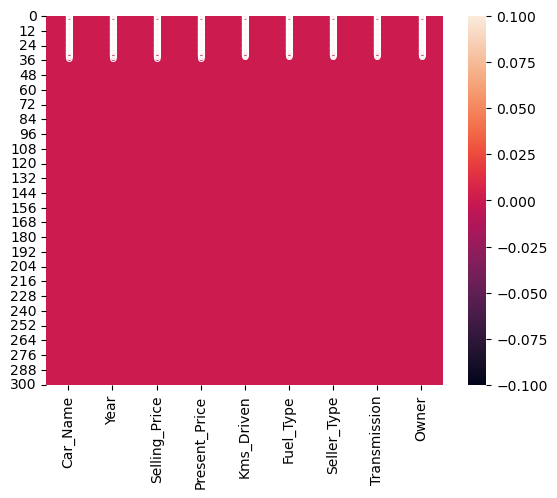

In [5]:
sns.heatmap(data.isnull(),annot=True)

<Axes: >

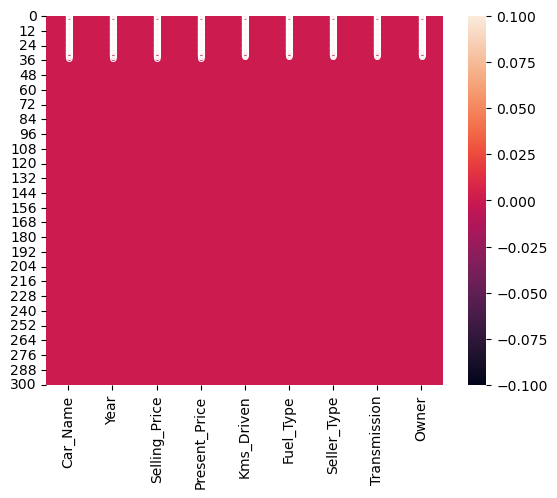

In [6]:
sns.heatmap(data.isna(),annot=True)

In [7]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

C:\Users\Fatin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Fatin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\Fatin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Fatin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

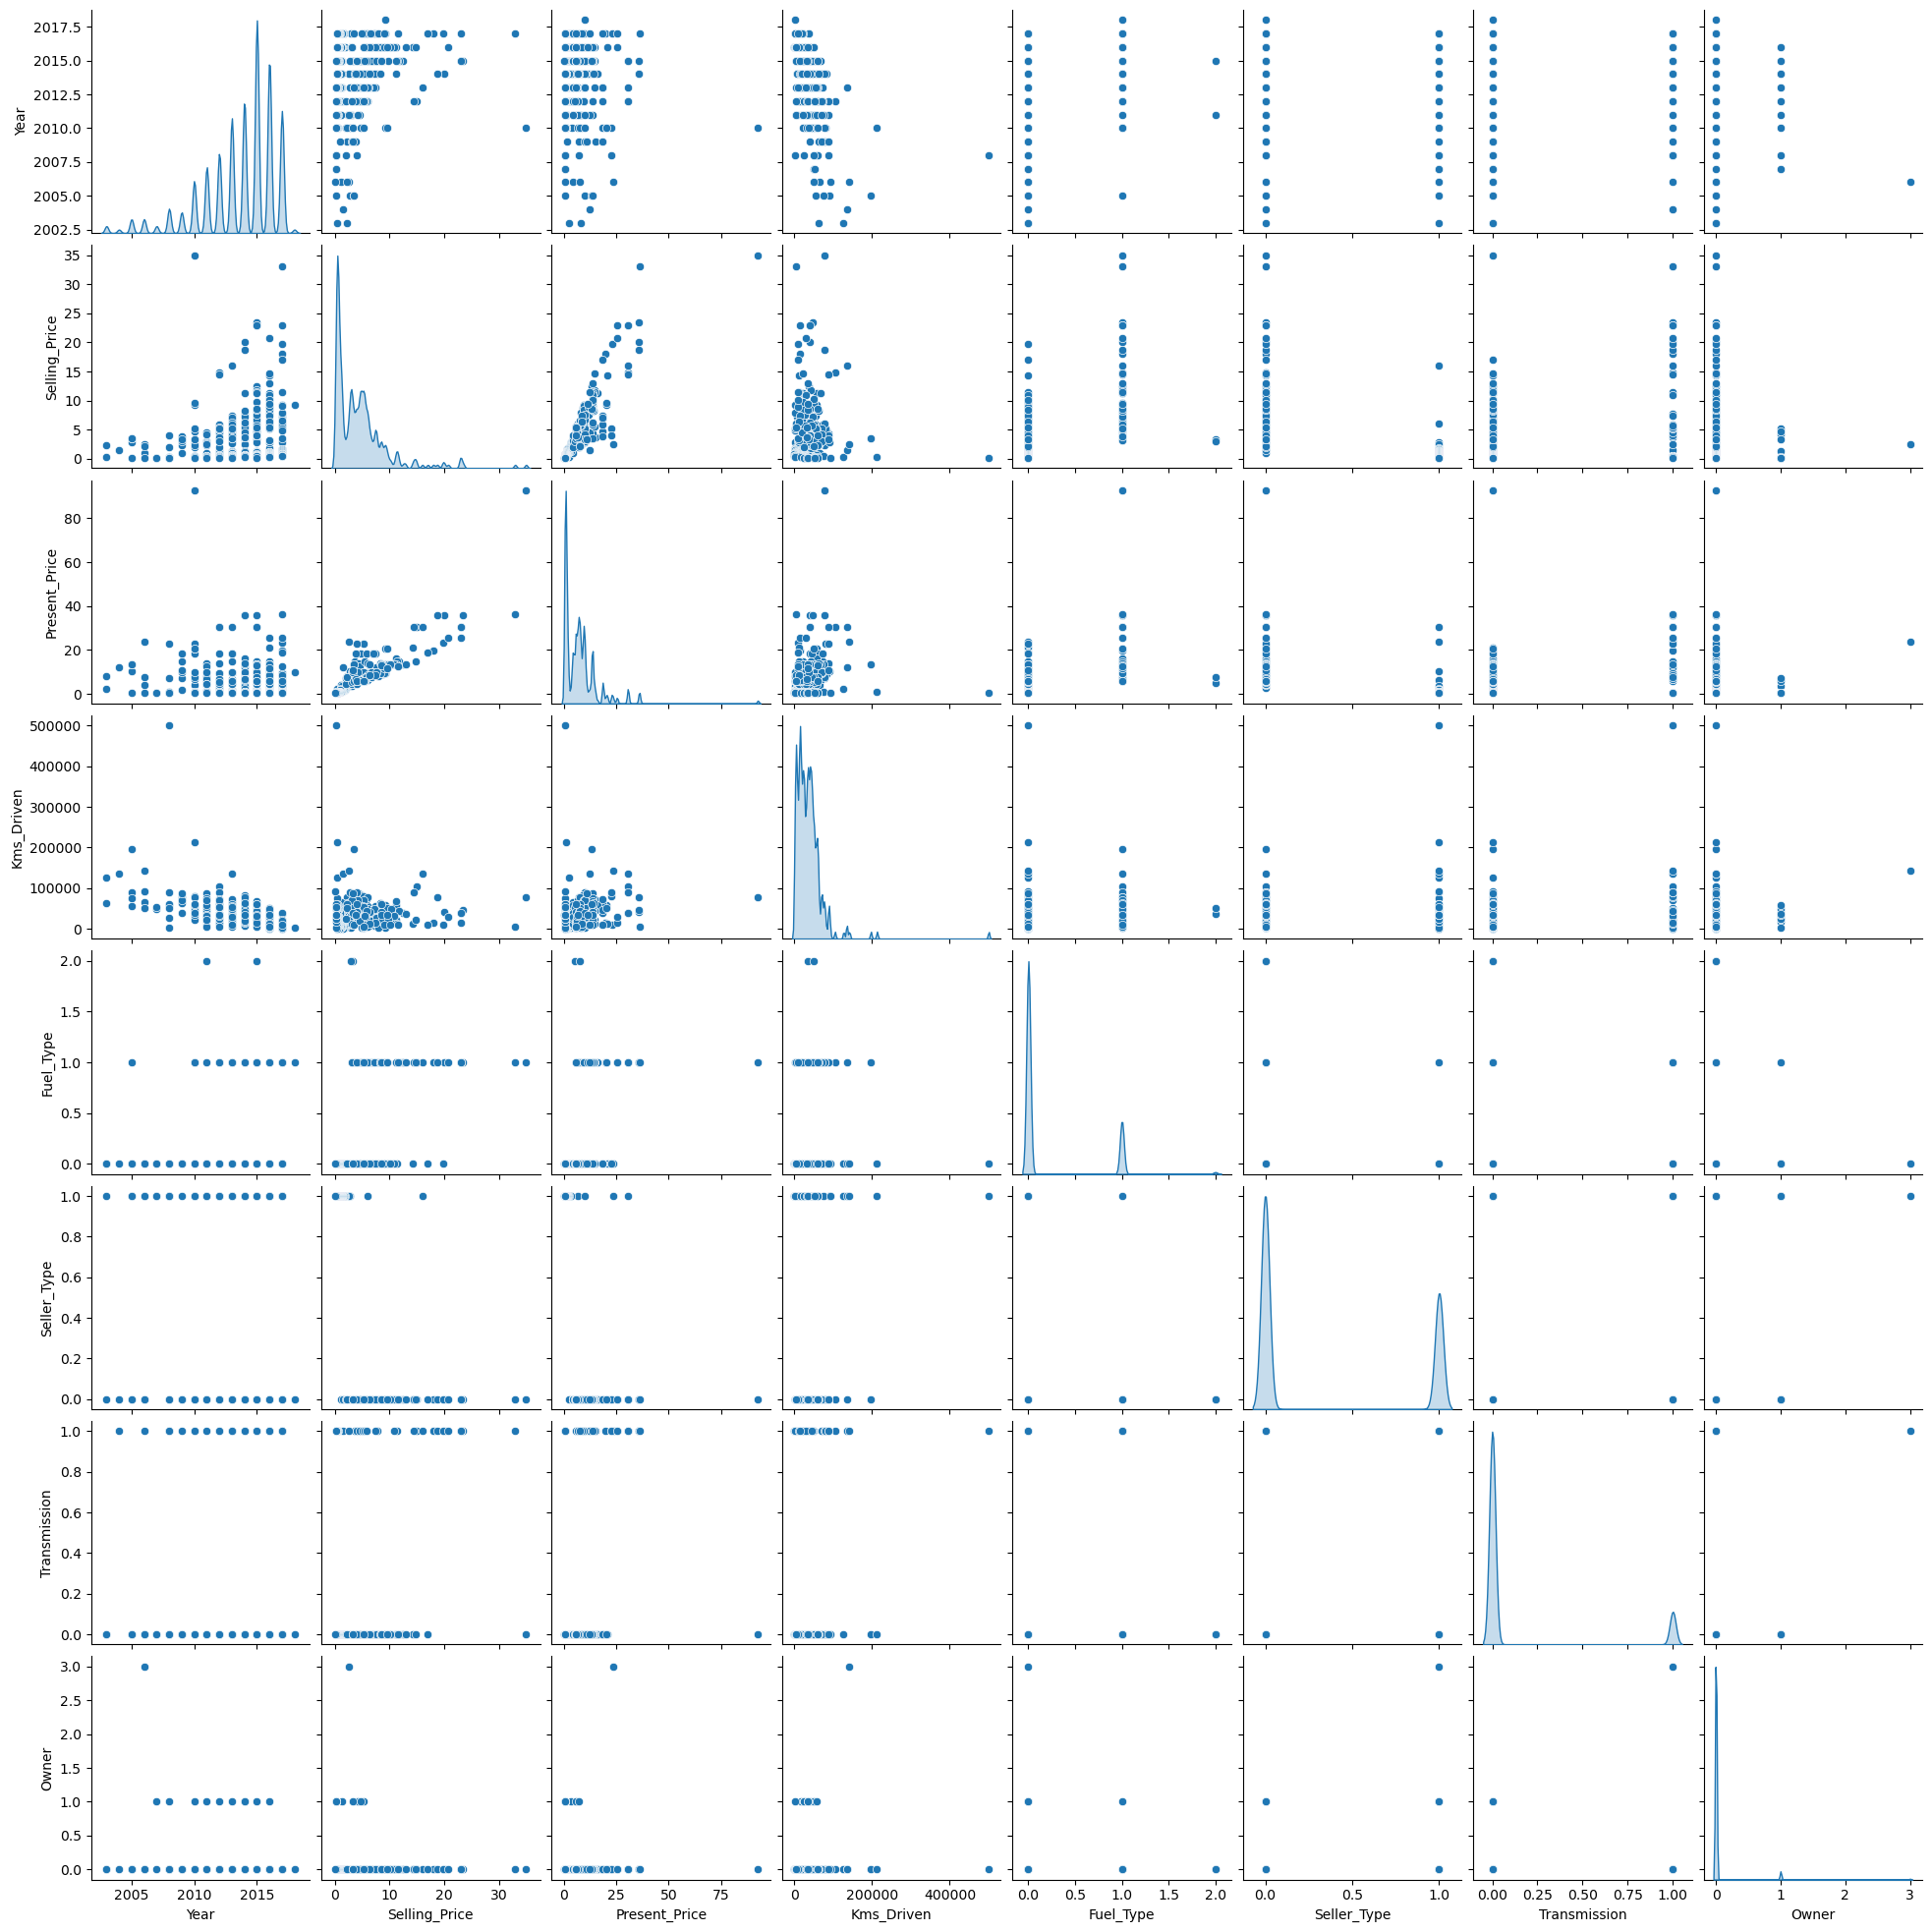

In [9]:
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

In [10]:
y=data.Selling_Price
x=data.drop(["Selling_Price","Car_Name"],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [13]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred=dtr.predict(x_test)

In [15]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

0.9926114754098362

In [22]:
import pickle
with open("car_price_new.pkl", "wb") as file:
    
    pickle.dump(dtr, file)

In [27]:
import joblib

In [28]:
joblib.dump(dtr, "car_price_new.joblib")

['car_price_new.joblib']